# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

KeyboardInterrupt: 

# 2. Importing Dataset

In [178]:
import os

# Update this with the correct dataset path
datapath = r"C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes\Revitsone-5classes"

image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

# Corrected Paths
categories = ["other_activities", "safe_driving", "talking_phone", "texting_phone", "turning"]
image_lists = [image_list_other, image_list_safe, image_list_talking, image_list_text, image_list_turn]

# Loop through each category
for category, image_list in zip(categories, image_lists):
    folder_path = os.path.join(datapath, category)
    
    if os.path.exists(folder_path):  # Check if the folder exists
        for file in os.listdir(folder_path):
            if file.endswith(".png") or file.endswith(".jpg"):
                image_list.append(os.path.join(folder_path, file))
    else:
        print(f"Warning: {folder_path} not found!")

# Print the number of images found in each category
for category, image_list in zip(categories, image_lists):
    print(f"{category}: {len(image_list)} images found")


other_activities: 2128 images found
safe_driving: 2203 images found
talking_phone: 2169 images found
texting_phone: 2203 images found
turning: 2063 images found


## 2.1. Data Preprocessing

In [179]:
# Define the correct local dataset path
datapath = r"C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes\Revitsone-5classes"

# Convert file paths to local paths before removing
files_to_remove_other = [
    "other_activities/img_79.jpg",
    "other_activities/img_4664.jpg",
    "other_activities/img_7973.jpg",
    "other_activities/img_13318.jpg",
    "other_activities/img_13396.jpg",
    "other_activities/img_13541.jpg",
    "other_activities/img_13625.jpg",
    "other_activities/img_20398.jpg",
    "other_activities/img_22266.jpg",
]

files_to_remove_turn = [
    "turning/img_8771.jpg",
    "turning/img_62337.jpg",
    "turning/img_67523.jpg",
    "turning/img_70552.jpg",
    "turning/img_84605.jpg",
    "turning/img_101434.jpg",
]

# Convert to full file paths
files_to_remove_other = [os.path.join(datapath, file) for file in files_to_remove_other]
files_to_remove_turn = [os.path.join(datapath, file) for file in files_to_remove_turn]

# Remove only if file exists in the list
image_list_other = [file for file in image_list_other if file not in files_to_remove_other]
image_list_turn = [file for file in image_list_turn if file not in files_to_remove_turn]

# Check if the files were removed
print("Remaining images in other_activities:", len(image_list_other))
print("Remaining images in turning:", len(image_list_turn))


Remaining images in other_activities: 2128
Remaining images in turning: 2063


In [180]:
font = {'family':'Times New Roman','color':'#000000'}
background_color = '#38b5c9'

## 2.2. Plot random images from each class

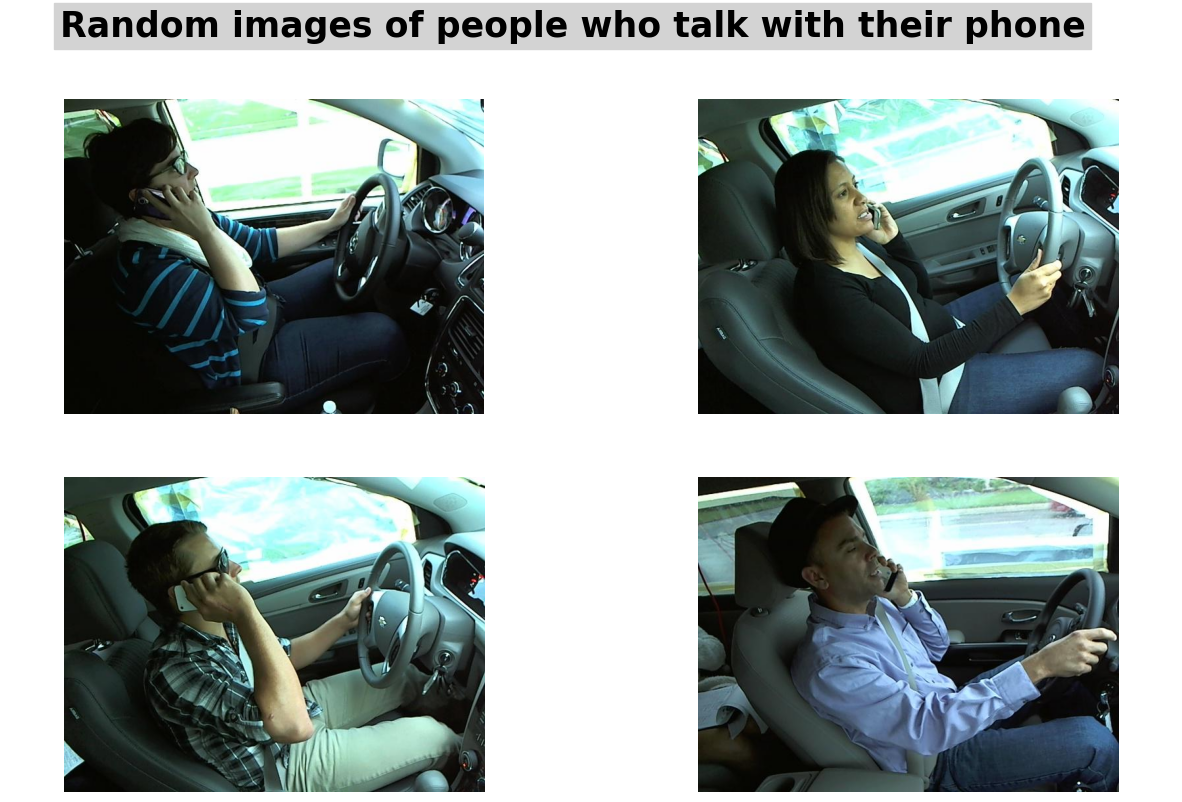

In [181]:
import random
import matplotlib.pyplot as plt
from skimage.io import imread

# Define missing variables
font_properties = {'fontsize': 25, 'weight': 'bold'}
background_color = 'lightgray'  # Change as per your preference

# Check if the list is not empty
if len(image_list_talking) == 0:
    print("No images found in 'image_list_talking'. Check your dataset path.")
else:
    plt.figure(1, figsize=(15, 9))
    plt.axis('off')
    n = 0

    for i in range(4):
        n += 1
        random_img = random.choice(image_list_talking)
        imgs = imread(random_img)

        plt.subplot(2, 2, n)
        plt.imshow(imgs)
        plt.axis('off')  # Hide axis for better visualization

    # Set the title correctly
    plt.suptitle("Random images of people who talk with their phone", 
                 fontsize=25, fontweight="bold", color="black", backgroundcolor=background_color)

    plt.show()


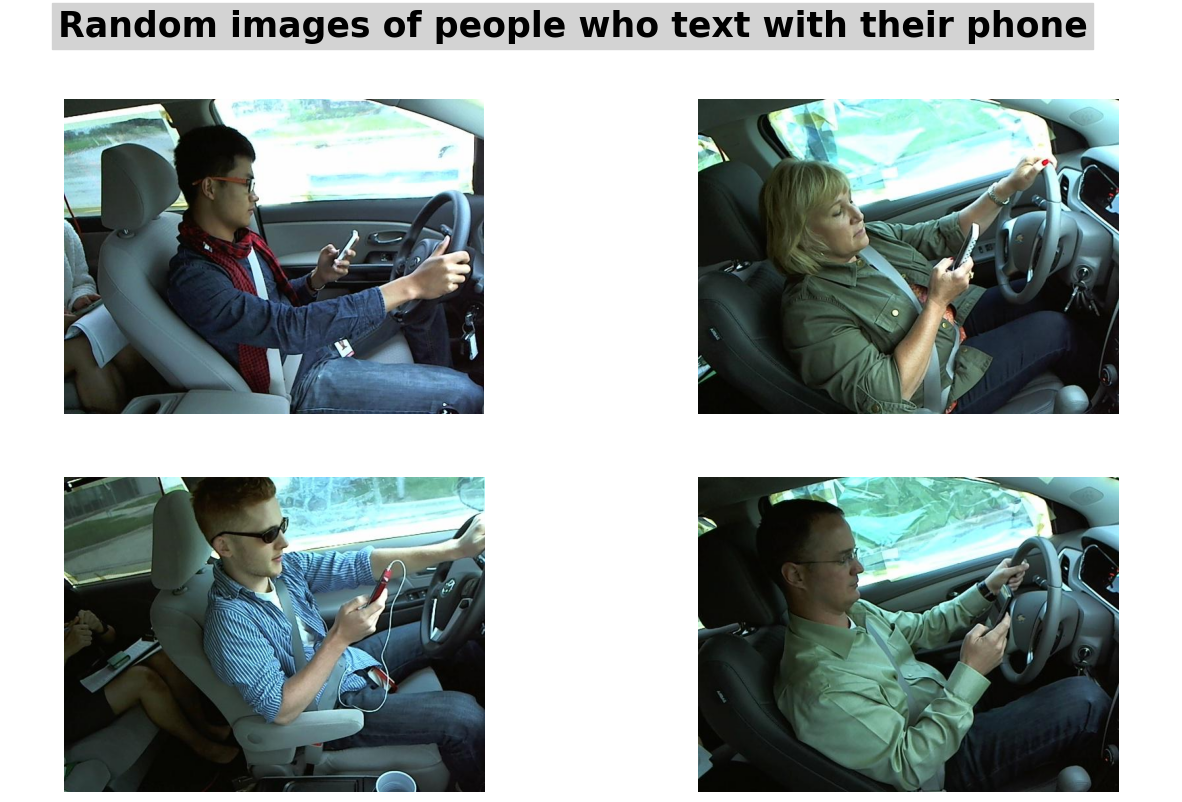

In [182]:
import random
import matplotlib.pyplot as plt
from skimage.io import imread

# Define missing variables
font_properties = {'fontsize': 25, 'weight': 'bold'}
background_color = 'lightgray'  # Change as per your preference

# Check if the list is not empty
if len(image_list_text) == 0:
    print("No images found in 'image_list_text'. Check your dataset path.")
else:
    plt.figure(1, figsize=(15, 9))
    plt.axis('off')
    n = 0

    for i in range(4):
        n += 1
        random_img = random.choice(image_list_text)
        imgs = imread(random_img)

        plt.subplot(2, 2, n)
        plt.imshow(imgs)
        plt.axis('off')  # Hide axis for better visualization

    # Set the title correctly
    plt.suptitle("Random images of people who text with their phone", 
                 fontsize=25, fontweight="bold", color="black", backgroundcolor=background_color)

    plt.show()


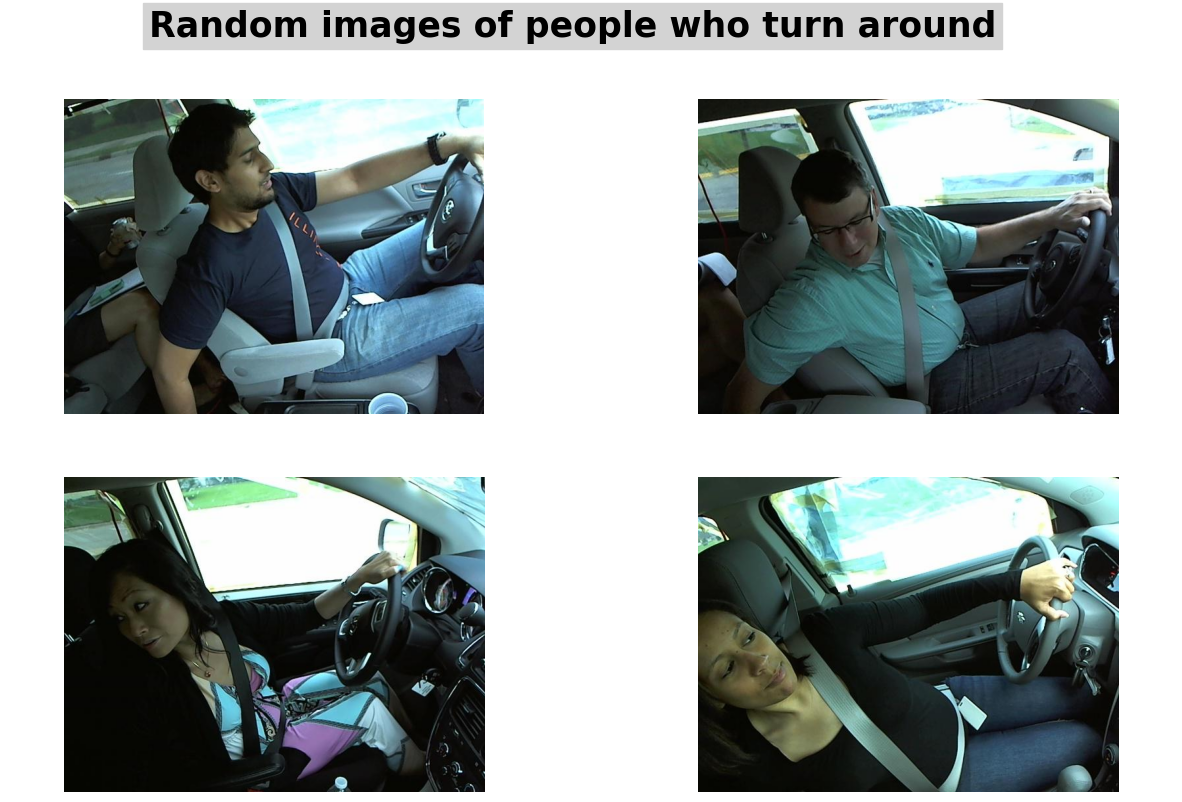

In [183]:
import random
import matplotlib.pyplot as plt
from skimage.io import imread

# Define missing variables
font_properties = {'fontsize': 25, 'weight': 'bold'}  # Define font properties
background_color = 'lightgray'  # Choose background color

# Check if the list is not empty
if len(image_list_turn) == 0:
    print("No images found in 'image_list_turn'. Check your dataset path.")
else:
    plt.figure(figsize=(15, 9))
    plt.axis('off')
    n = 0

    for i in range(4):
        n += 1
        random_img = random.choice(image_list_turn)
        imgs = imread(random_img)

        plt.subplot(2, 2, n)
        plt.imshow(imgs)
        plt.axis('off')  # Hide axis for better visualization

    # Set the title correctly
    plt.suptitle("Random images of people who turn around", 
                 fontsize=25, fontweight="bold", color="black", backgroundcolor=background_color)

    plt.show()


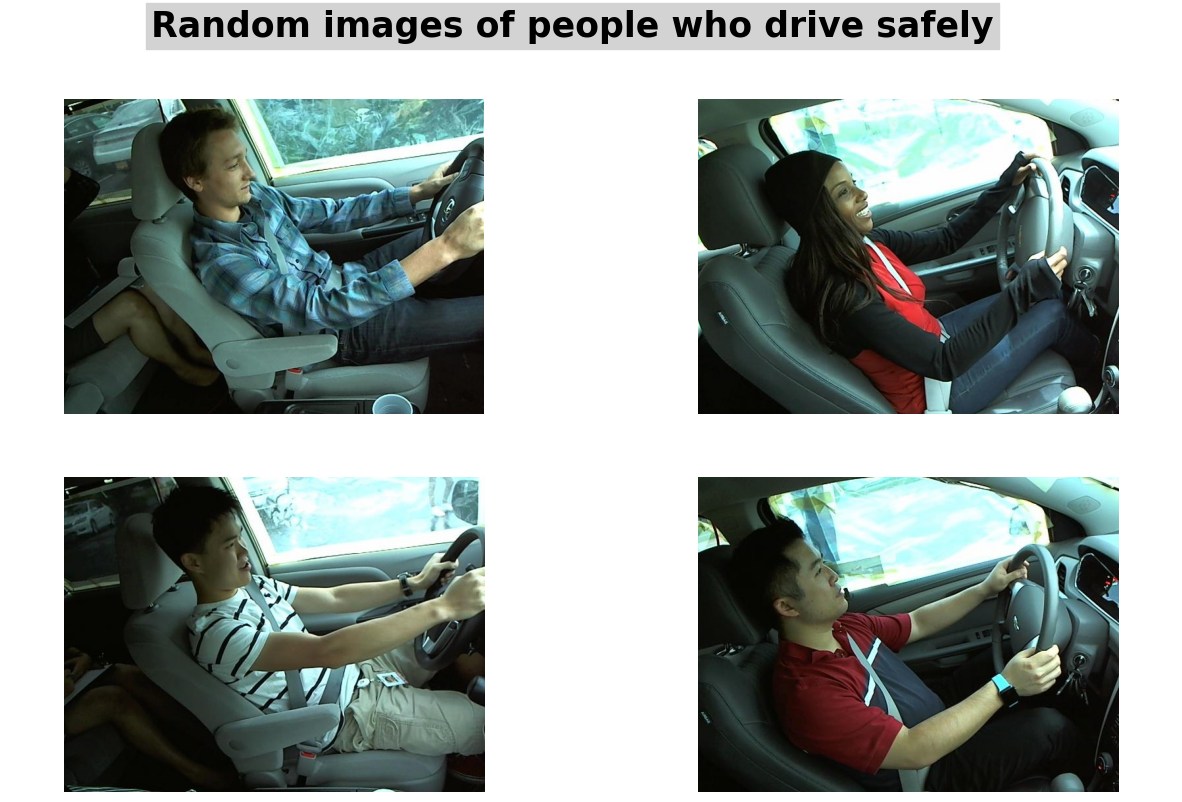

In [184]:
import random
import matplotlib.pyplot as plt
from skimage.io import imread

# Define missing variables
background_color = 'lightgray'  # Background color for the title

# Check if the list is not empty
if len(image_list_safe) == 0:
    print("No images found in 'image_list_safe'. Check your dataset path.")
else:
    plt.figure(figsize=(15, 9))
    plt.axis('off')
    n = 0

    for i in range(4):
        n += 1
        random_img = random.choice(image_list_safe)
        imgs = imread(random_img)

        plt.subplot(2, 2, n)
        plt.imshow(imgs)
        plt.axis('off')  # Hide axis for better visualization

    # Corrected plt.suptitle usage
    plt.suptitle("Random images of people who drive safely", 
                 fontsize=25, fontweight="bold", color="black", backgroundcolor=background_color)

    plt.show()


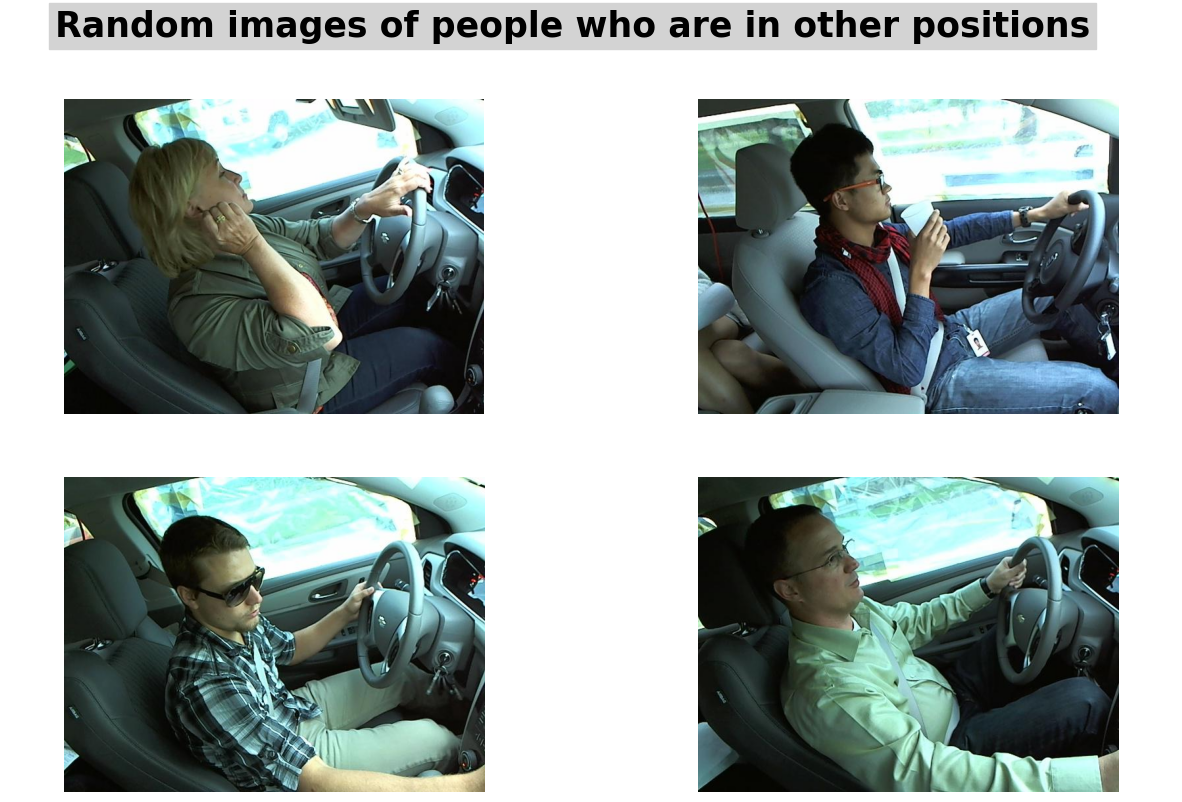

In [185]:
import random
import matplotlib.pyplot as plt
from skimage.io import imread

# Define missing variables
background_color = 'lightgray'  # Background color for the title

# Check if the list is not empty
if len(image_list_other) == 0:
    print("No images found in 'image_list_other'. Check your dataset path.")
else:
    plt.figure(figsize=(15, 9))
    plt.axis('off')
    n = 0

    for i in range(4):
        n += 1
        random_img = random.choice(image_list_other)
        imgs = imread(random_img)

        plt.subplot(2, 2, n)
        plt.imshow(imgs)
        plt.axis('off')  # Hide axis for better visualization

    # Corrected plt.suptitle usage
    plt.suptitle("Random images of people who are in other positions", 
                 fontsize=25, fontweight="bold", color="black", backgroundcolor=background_color)

    plt.show()


## 2.3. Data Splitting

In [186]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  2128
Number of samples in (Class = Safe Driving) =  2203
Number of samples in (Class = Talking Phone) =  2169
Number of samples in (Class = Texting Phone) =  2203
Number of samples in (Class = Turning) =  2063


In [187]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

1596.0 425.6 106.4
1652.25 440.6 110.15
1626.75 433.8 108.45
1652.25 440.6 110.15
1547.25 412.6 103.15


In [188]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
1589 423 116
1652 440 111
1626 433 110
1652 440 111
1547 412 104


## 2.4. Creating Dataframes

In [189]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [190]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [191]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [192]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [193]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  8066
Number of rows in test dataframe is:  2148
Number of rows in val dataframe is:  552


In [194]:
random_img_height = random.choice(train_other)

image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


## 2.5. Define hyperparameters

In [195]:
Batch_size = 64
Img_height = 240
Img_width = 240

## 2.6. Image rescaling

In [196]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [197]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 8066 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 552 validated image filenames belonging to 5 classes.


In [198]:
from PIL import Image
import os

dataset_path = r"C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes\Revitsone-5classes"
for filename in os.listdir(dataset_path):
    try:
        img = Image.open(os.path.join(dataset_path, filename))
        img.verify()  # Check if the image is corrupted
    except Exception as e:
        print(f"Corrupted image: {filename}, Error: {e}")


Corrupted image: other_activities, Error: [Errno 13] Permission denied: 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\Revitsone-5classes\\other_activities'
Corrupted image: safe_driving, Error: [Errno 13] Permission denied: 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\Revitsone-5classes\\safe_driving'
Corrupted image: talking_phone, Error: [Errno 13] Permission denied: 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\Revitsone-5classes\\talking_phone'
Corrupted image: texting_phone, Error: [Errno 13] Permission denied: 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\Revitsone-5classes\\texting_phone'
Corrupted image: turning, Error: [Errno 13] Permission denied: 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\Revitsone-5classes\\turning'


In [199]:
from PIL import Image
import os

# 🔹 Update the dataset path
dataset_path = "C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes"

# 🔹 Loop through all files in the dataset
for filename in os.listdir(dataset_path):
    file_path = os.path.join(dataset_path, filename)

    # 🔸 Skip directories
    if os.path.isdir(file_path):
        continue

    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify image integrity
    except Exception as e:
        print(f"Deleting corrupted image: {filename} - Error: {e}")
        try:
            os.remove(file_path)  # Delete the corrupt image
        except PermissionError:
            print(f"❌ Permission denied: {filename} - Skipping...")

print("✅ Corrupt image cleanup completed!")


✅ Corrupt image cleanup completed!


In [200]:
# Get the first batch from trainDataset
image_batch, label_batch = next(trainDataset)

# Print shapes
print(f"Image batch shape: {image_batch.shape}, Label batch shape: {label_batch.shape}")


Image batch shape: (64, 240, 240, 3), Label batch shape: (64, 5)


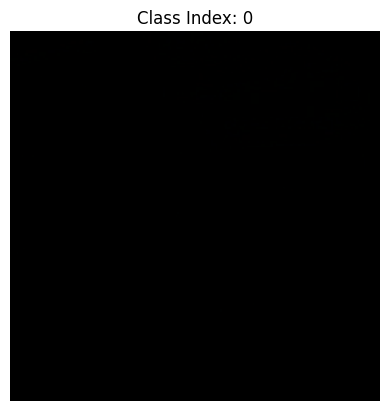

In [201]:
import matplotlib.pyplot as plt

# Select first image and label
image_sample = image_batch[0]  # First image
label_sample = label_batch[0]  # First label (one-hot encoded)

# Convert one-hot label to class index
class_index = label_sample.argmax()

# Display the image
plt.imshow(image_sample.astype("uint8"))
plt.axis("off")
plt.title(f"Class Index: {class_index}")  # Show the class index
plt.show()


In [202]:
import numpy as np

# Count occurrences of each class
class_counts = np.sum(label_batch, axis=0)
print(f"Class distribution in this batch: {class_counts}")


Class distribution in this batch: [13. 16. 10. 11. 14.]


# **3. AlexNet**

In [203]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 58, 58, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 58, 58, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

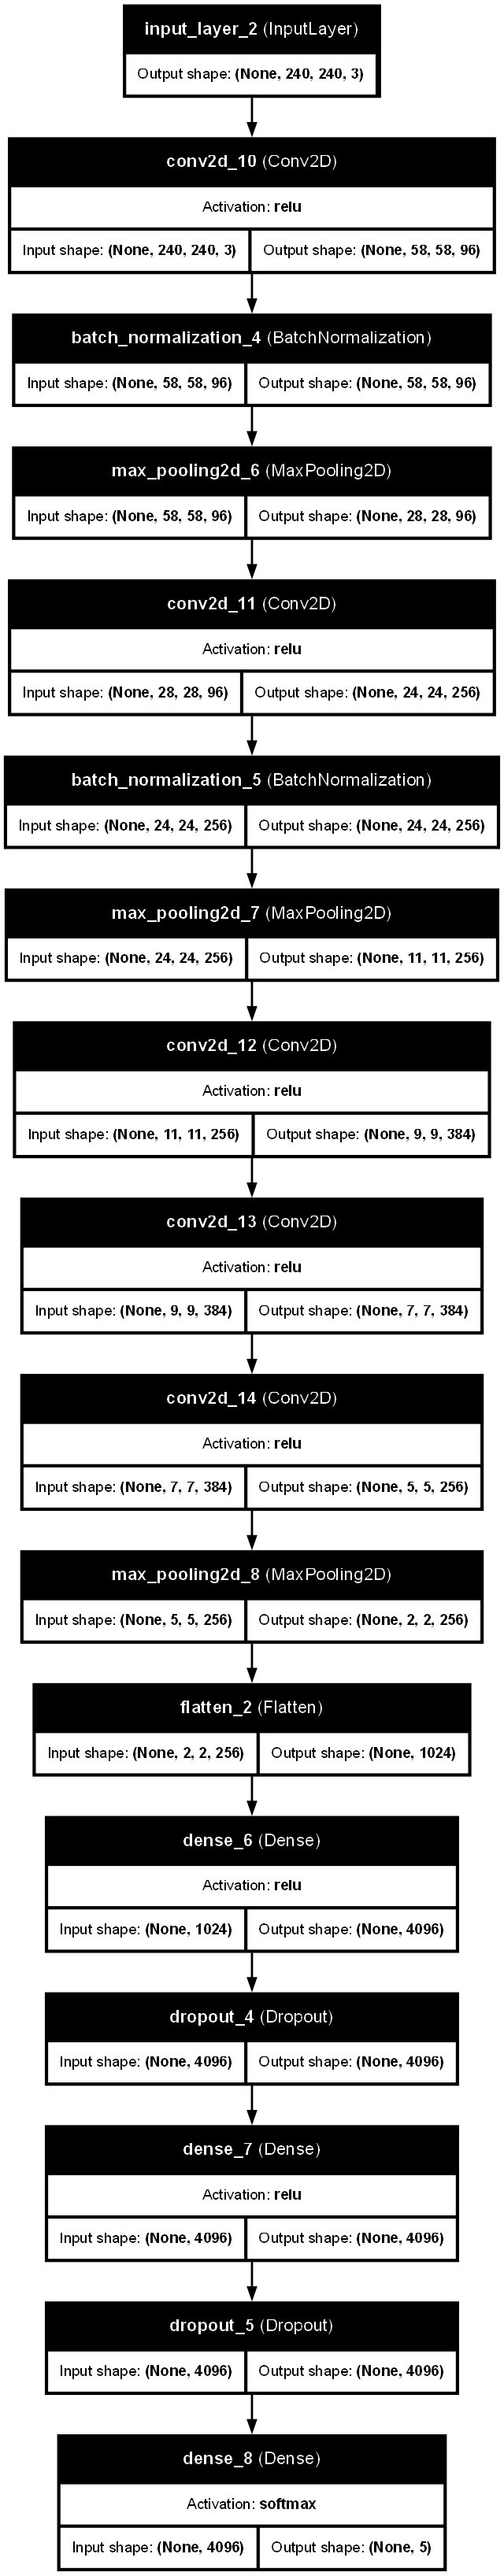

In [204]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [205]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [208]:
import os
from PIL import Image

dataset_dir = "C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes"

def check_images(directory):
    corrupt_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.load()  # Fully loads the image
            except Exception as e:
                corrupt_files.append(file_path)
                print(f"❌ Corrupt image detected: {file_path} - Error: {e}")

    print(f"✅ Total corrupt images found: {len(corrupt_files)}")

check_images(dataset_dir)


❌ Corrupt image detected: C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\other_activities\img_13318.jpg - Error: cannot identify image file 'C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\\other_activities\\img_13318.jpg'
❌ Corrupt image detected: C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\other_activities\img_13396.jpg - Error: cannot identify image file 'C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\\other_activities\\img_13396.jpg'
❌ Corrupt image detected: C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\other_activities\img_13541.jpg - Error: cannot identify image file 'C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\\other_activities\\img_13541.jpg'
❌ Corrupt image detected: C:/Users/jaysh/Downloads/Driver-Behavior-Detection-main/archive/Revitsone-5classes\other_act

In [210]:
import os
from PIL import Image

dataset_dir = r"C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes"

def remove_corrupt_images(directory):
    corrupt_files = []  # Store corrupt file paths
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Check if the image is valid
            except (IOError, SyntaxError, Image.DecompressionBombError) as e:
                print(f"❌ Corrupt image detected: {file_path} - Error: {e}")
                corrupt_files.append(file_path)

    # Remove corrupt images
    for file in corrupt_files:
        os.remove(file)
        print(f"🗑 Deleted: {file}")

    print(f"✅ Cleanup completed! Total corrupt images removed: {len(corrupt_files)}")

remove_corrupt_images(dataset_dir)


❌ Corrupt image detected: C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes\other_activities\img_13318.jpg - Error: cannot identify image file 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\other_activities\\img_13318.jpg'
❌ Corrupt image detected: C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes\other_activities\img_13396.jpg - Error: cannot identify image file 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\other_activities\\img_13396.jpg'
❌ Corrupt image detected: C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes\other_activities\img_13541.jpg - Error: cannot identify image file 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\other_activities\\img_13541.jpg'
❌ Corrupt image detected: C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-

In [211]:
import os

dataset_dir = r"C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes"
categories = ["other_activities", "safe_driving", "talking_phone", "texting_phone", "turning"]

for category in categories:
    folder_path = os.path.join(dataset_dir, category)
    image_count = len([f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))])
    print(f"✅ {category}: {image_count} images remaining")


✅ other_activities: 2119 images remaining
✅ safe_driving: 2203 images remaining
✅ talking_phone: 2169 images remaining
✅ texting_phone: 2203 images remaining
✅ turning: 2057 images remaining


In [209]:
import os

datapath = r"C:\Users\jaysh\Downloads\Driver-Behavior-Detection-main\archive\Revitsone-5classes"

categories = ["other_activities", "safe_driving", "talking_phone", "texting_phone", "turning"]

for category in categories:
    folder_path = os.path.join(datapath, category)
    if not os.path.exists(folder_path):
        print(f"⚠️ Warning: Folder {folder_path} is missing!")
    else:
        num_files = len([f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png"))])
        print(f"✅ {category}: {num_files} images found")


✅ other_activities: 2128 images found
✅ safe_driving: 2203 images found
✅ talking_phone: 2169 images found
✅ texting_phone: 2203 images found
✅ turning: 2063 images found


In [212]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jaysh\\Downloads\\Driver-Behavior-Detection-main\\archive\\Revitsone-5classes\\Revitsone-5classes\\other_activities\\img_13541.jpg'

In [ ]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

NameError: name 'Alex_model' is not defined

In [ ]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

NameError: name 'training_loss_alex' is not defined

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

NameError: name 'epoch_count' is not defined

<Figure size 2000x1000 with 0 Axes>

# **4. VGGNet**

In [ ]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 236, 236, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 236, 236, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 118, 118, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 116, 116, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 114, 114, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 114, 114, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 55, 55, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 53, 53, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 51, 51, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 51, 51, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   169,873,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

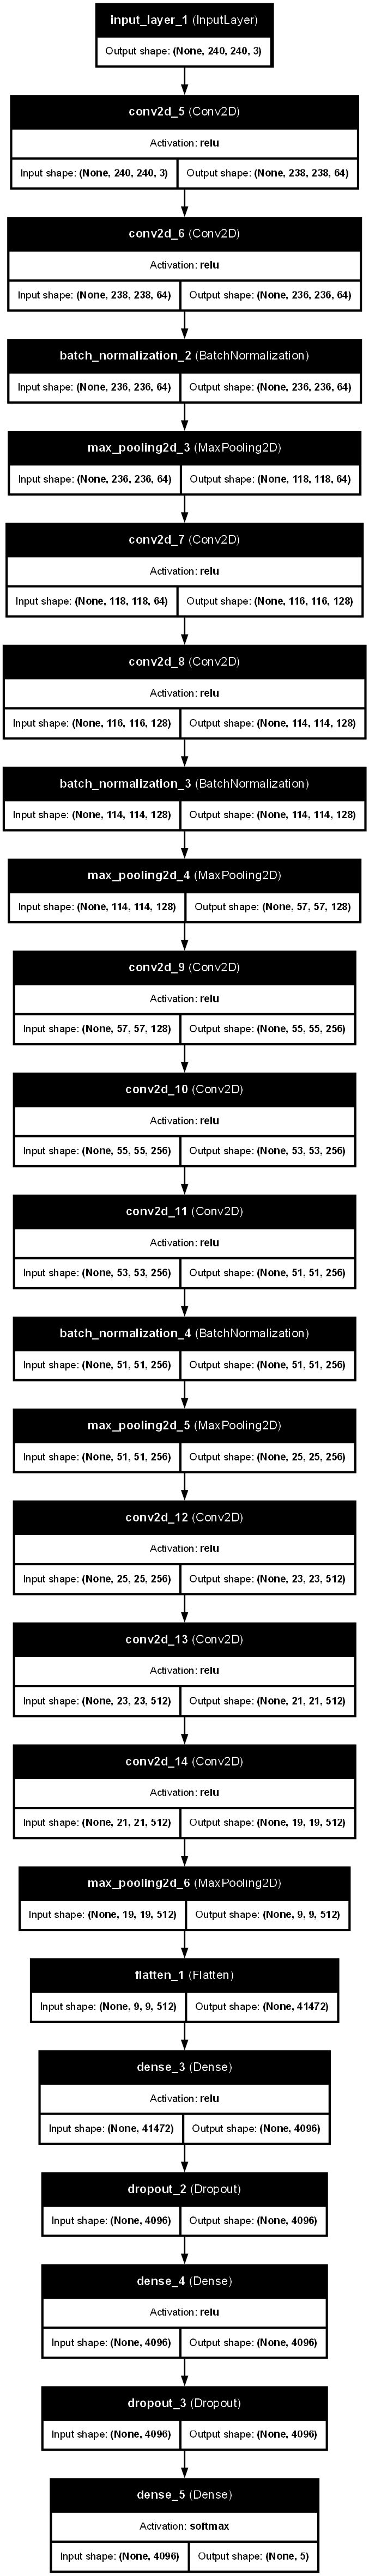

In [ ]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
  6/127 ━━━━━━━━━━━━━━━━━━━━ 40:46 20s/step - accuracy: 0.2136 - loss: 0.5249

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000022F860247C0>
Traceback (most recent call last):

  File "c:\Python312\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Python312\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python312\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "c:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python312\Lib\site-packages\keras\src\utils\image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python312\Lib\site-packages\PIL\Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000022F860247C0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_12264]

In [ ]:
training_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
training_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

# **5. ResNet**

In [ ]:
def ResNet34 ():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
     
        
    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    
    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    
    
    
    
    model_Res = models.Model(inputs=inp, outputs=x)

    return model_Res

model_Res = ResNet34()
model_Res.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 117, 117, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 15, 15, 256)    │         1,02

 Total params: 160,858,117 (613.63 MB)

 Trainable params: 160,850,437 (613.60 MB)

 Non-trainable params: 7,680 (30.00 KB)

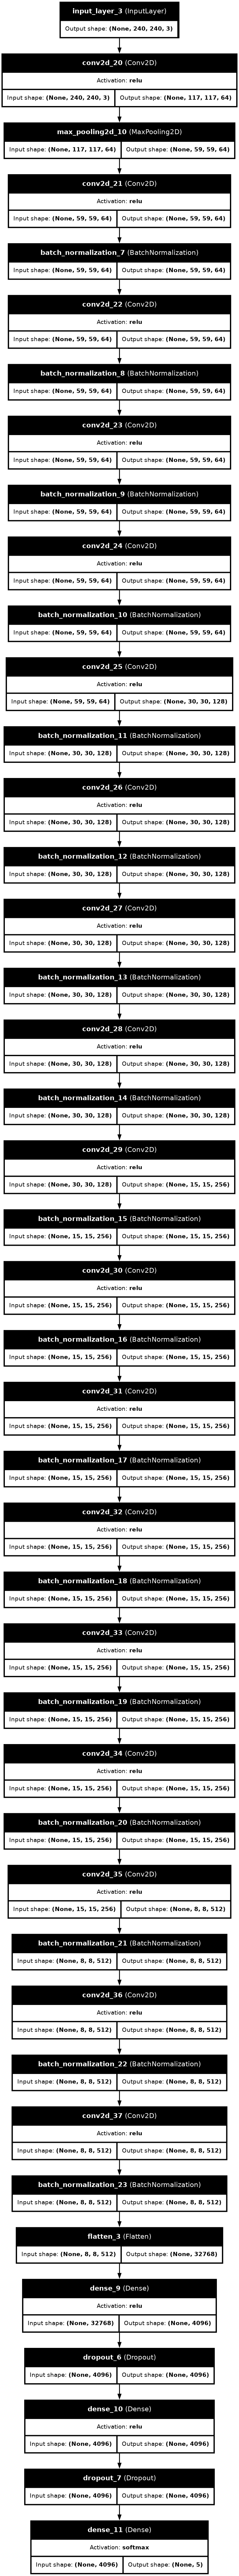

In [ ]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Res.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
RES_model = model_Res.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 80s 404ms/step - accuracy: 0.2566 - loss: 1.1005 - val_accuracy: 0.1993 - val_loss: 9.0390
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 297ms/step - accuracy: 0.2903 - loss: 0.4777 - val_accuracy: 0.2142 - val_loss: 4.9542
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 294ms/step - accuracy: 0.3064 - loss: 0.4576 - val_accuracy: 0.3445 - val_loss: 0.4706
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 292ms/step - accuracy: 0.3245 - loss: 0.4333 - val_accuracy: 0.3073 - val_loss: 0.4457
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.3171 - loss: 0.4564 - val_accuracy: 0.2756 - val_loss: 1.2109
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - accuracy: 0.3042 - loss: 0.4527 - val_accuracy: 0.2961 - val_loss: 1.0927
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - accuracy: 0.3241 - loss: 0.4421 - val_accuracy: 0.2272 - val_loss: 1.1819
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.2965 - loss: 0

In [ ]:
training_loss_res = RES_model.history['loss']
val_loss_res = RES_model.history['val_loss']
training_acc_res = RES_model.history['accuracy']
val_acc_res = RES_model.history['val_accuracy']

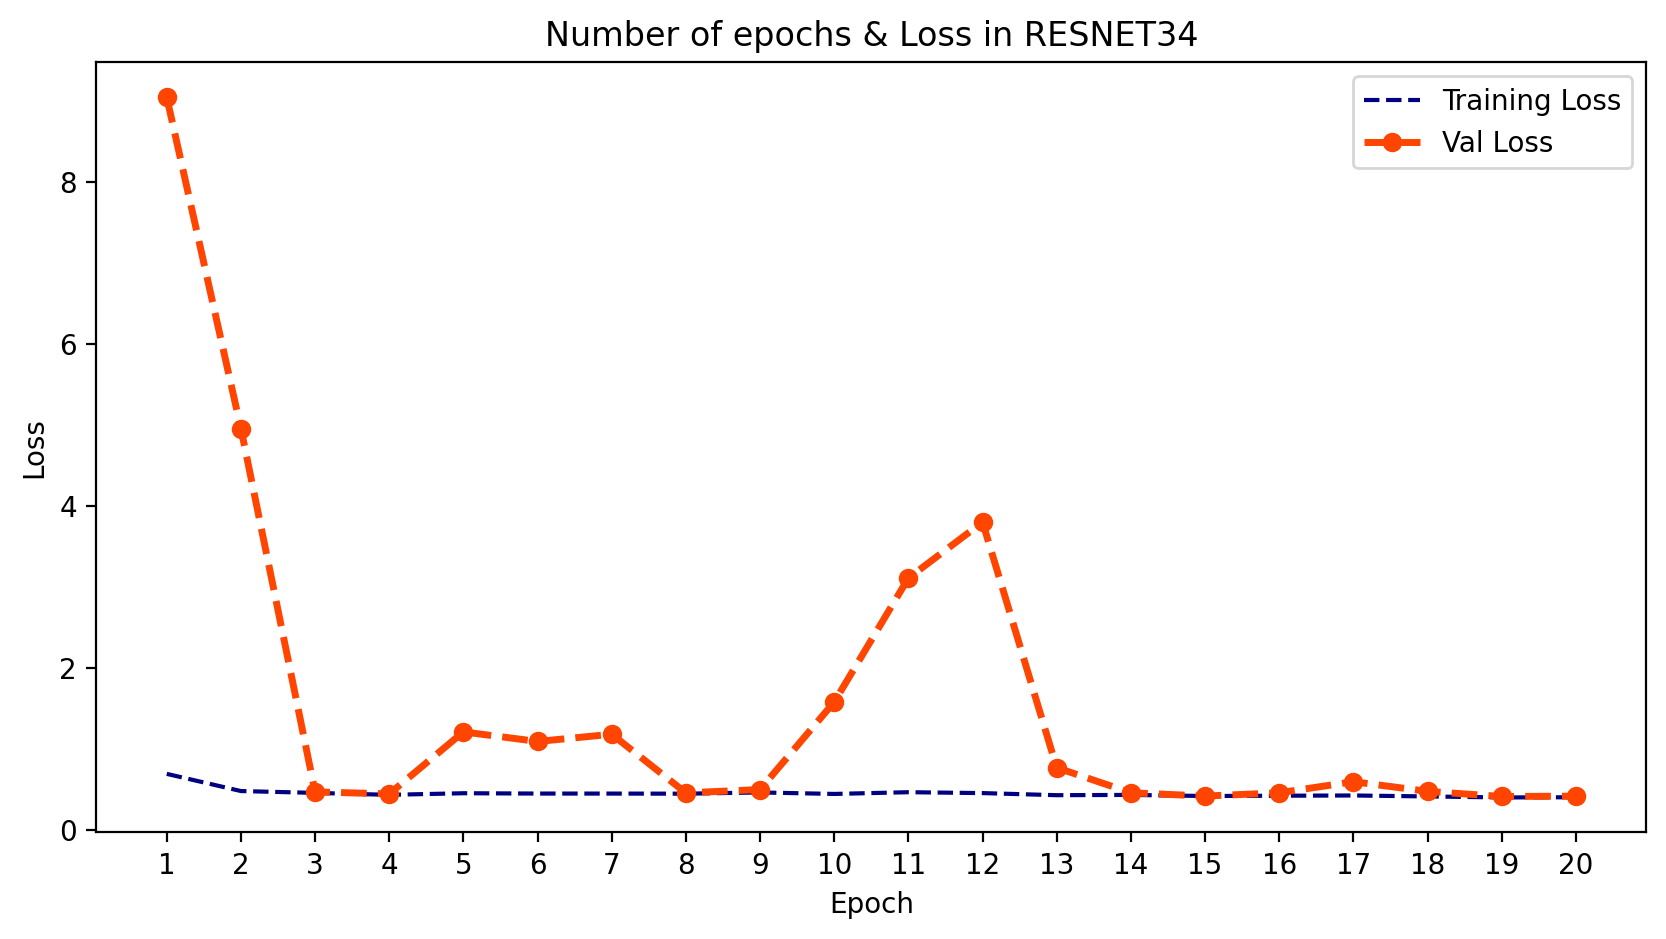

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

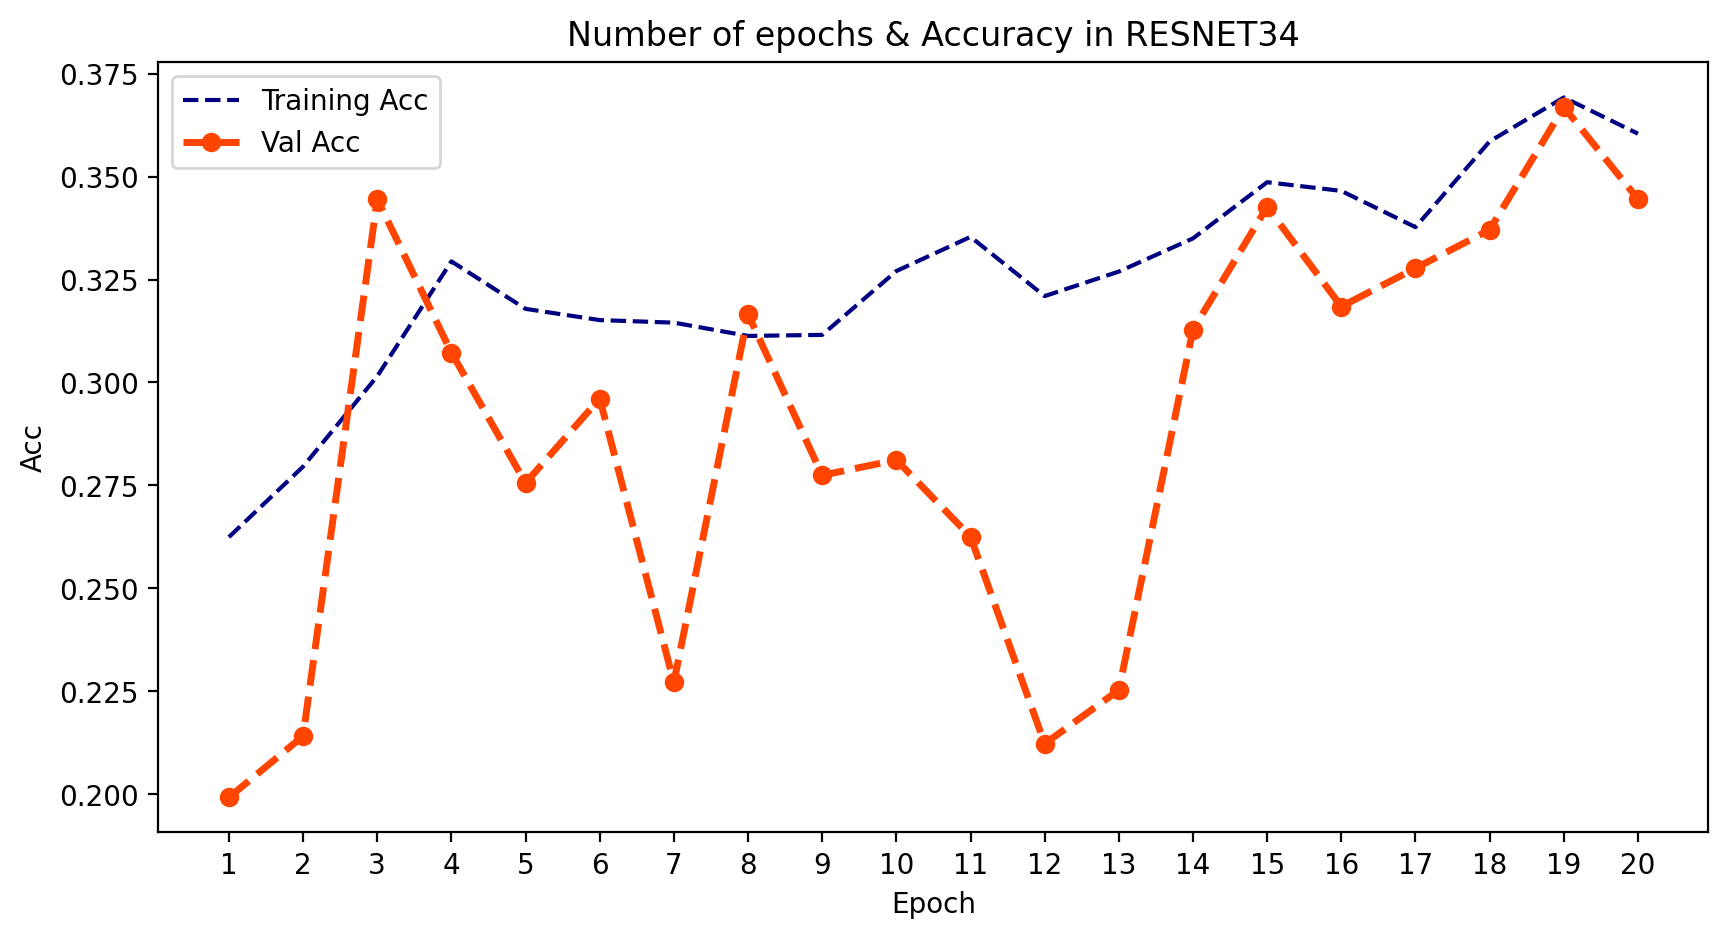

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

# 6. Result and Comparison

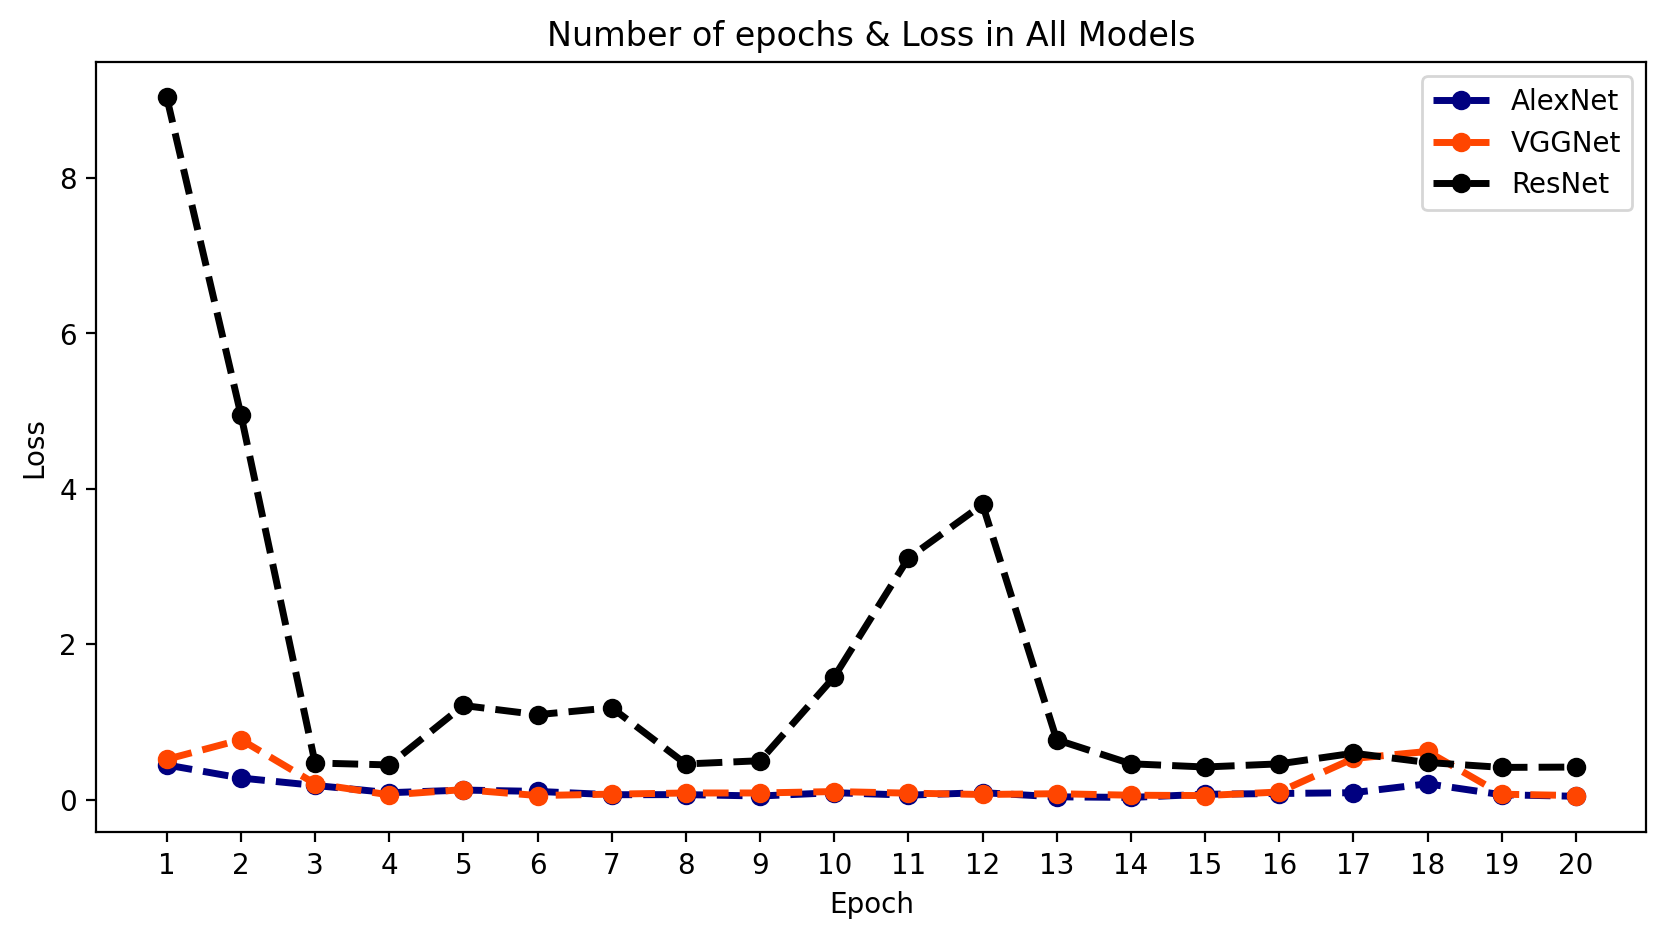

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_loss_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

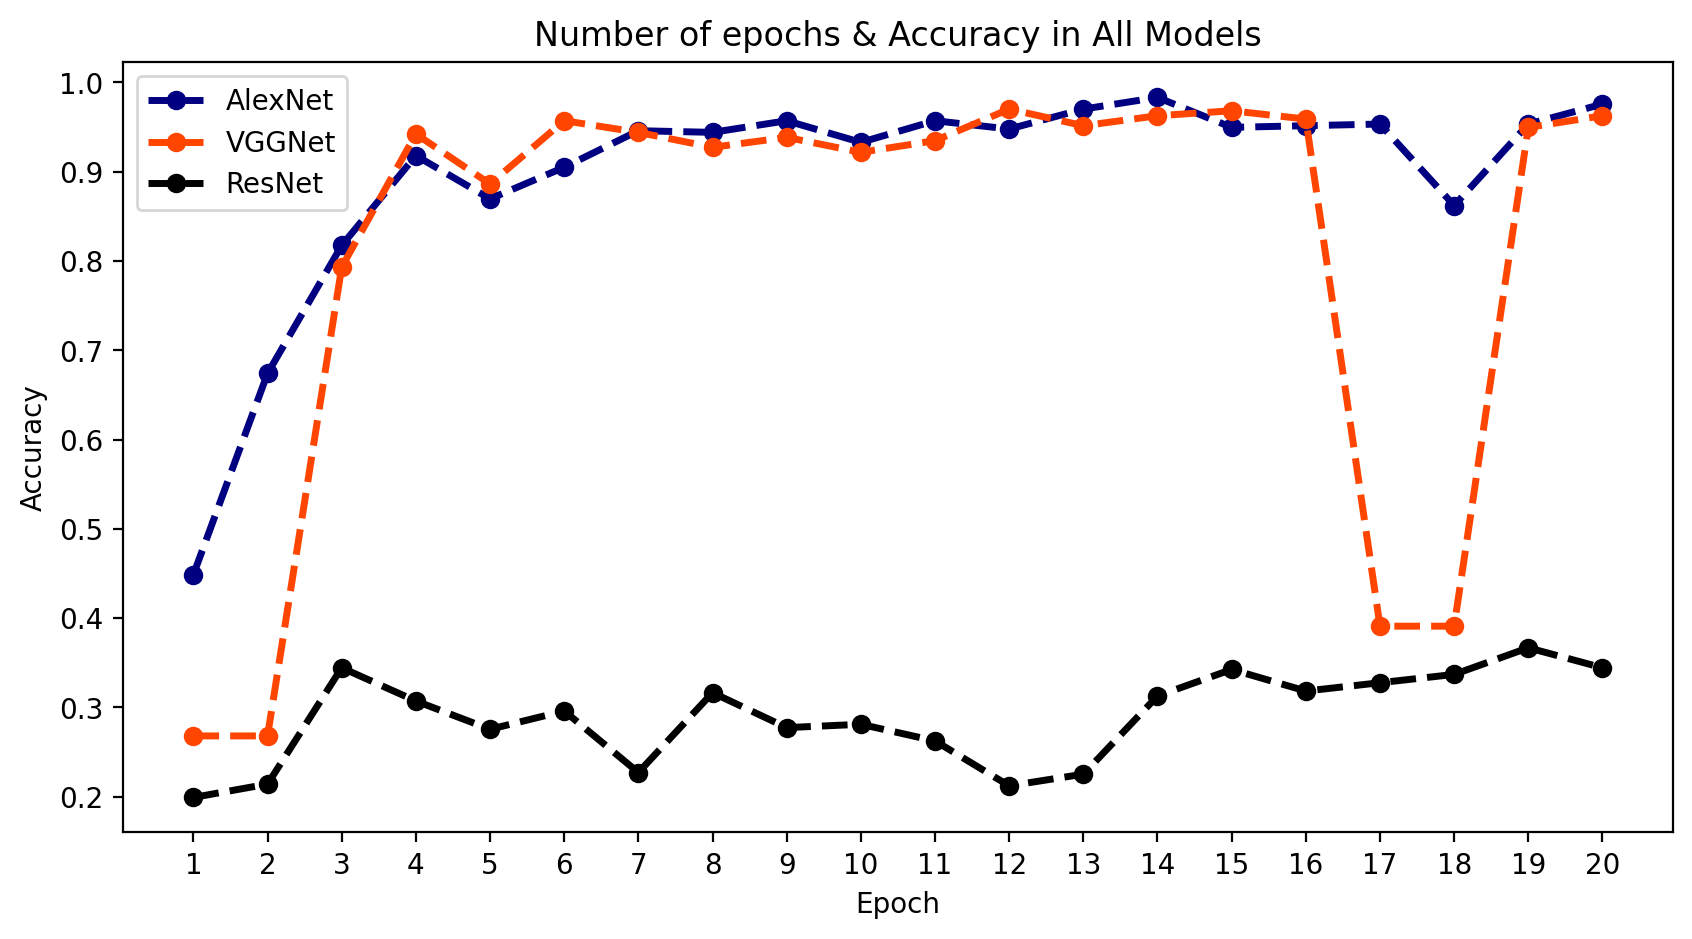

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_acc_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
# Save your models
model_Alex.save('alexnet_model.h5')
model_VGG.save('vgg_model.h5')
model_Res.save('resnet_model.h5')
